# Introduction: 
In this analysis, I will be analysing my facebook usage data, focusing on my posts since I joined in 2010. The dataset contains 465 rows and 5 columns downloaded from the facebook site.

# Research Questions: 
1. How often are my facebook posts?
2. Has there been a change in the frequency of my posts?

In [1]:
#import relevant python libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Wrangling 
The pandas library will be used to display basic information about the dataset.

In [2]:
df=pd.read_json('your_posts_1.json')
df.head(5)

,timestamp,attachments,data,title,tags
0,2020-12-09 12:57:08,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'Whew! It has been quite the year a...,NaN,NaN
1,2020-10-23 14:27:16,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': '20.10.20. Who will pay for this los...,NaN,NaN
2,2020-10-14 16:55:45,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'Many young Nigerians have been push...,NaN,NaN
3,2020-07-25 07:45:07,[],[{'update_timestamp': 1595663107}],NaN,NaN
4,2020-07-22 11:20:12,[],[{'update_timestamp': 1595416812}],NaN,NaN


In [3]:
df.shape

(465, 5)

# Data Cleaning
The focus of the analysis is on the frequency of the post, not the attached files or the content of the post. So all the unnecessary columns will be dropped. The timestamp column will also be renamed as the date column. 

In [4]:
#drop unnecessary columns
df.drop (['attachments', 'title', 'tags'], axis=1, inplace=True)

In [5]:
#rename the timestamp column to a date column 
df.rename(columns={'timestamp':'date'}, inplace=True)


In [6]:
df.head(5)

,date,data
0,2020-12-09 12:57:08,[{'post': 'Whew! It has been quite the year a...
1,2020-10-23 14:27:16,[{'post': '20.10.20. Who will pay for this los...
2,2020-10-14 16:55:45,[{'post': 'Many young Nigerians have been push...
3,2020-07-25 07:45:07,[{'update_timestamp': 1595663107}]
4,2020-07-22 11:20:12,[{'update_timestamp': 1595416812}]


In [7]:
df.tail(5)

,date,data
460,2010-11-22 00:12:57,[{'post': 'Hmmn. . . . . . . . My exams starts...
461,2010-10-01 08:50:42,[{'post': 'Lets luk at d cup half-full.Lets c ...
462,2010-09-04 07:21:13,[{'post': 'Failing does not mean u r a failure...
463,2010-08-28 06:28:05,"[{'post': 'Even if u are a street sweeper, swe..."
464,2010-08-23 06:54:24,[{'post': 'Today is the first day of the rest ...


In [8]:
df=df.set_index('date')

In [9]:
post_counts=df['data'].resample('MS').size()
post_counts

date
2010-08-01    2
2010-09-01    1
2010-10-01    1
2010-11-01    1
2010-12-01    2
             ..
2020-08-01    0
2020-09-01    0
2020-10-01    2
2020-11-01    0
2020-12-01    1
Freq: MS, Name: data, Length: 125, dtype: int64

# Data Visualisation

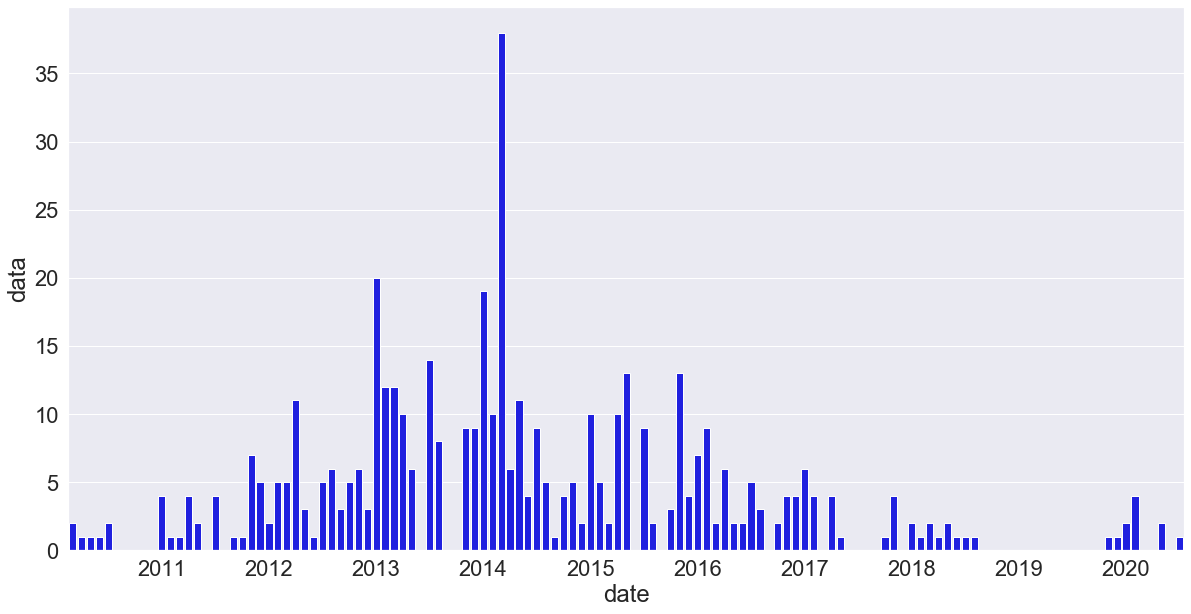

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)

# set x labels
x_labels = post_counts.index

#create bar plot
sns.barplot(x_labels, post_counts, color="blue")

#show x-axis labels for Jan 1 of every year only
tick_positions = np.arange(10, len(x_labels), step=12)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

The chart showed my Facebook usage. I was most active in 2014 which is very interesting as that year was my final year in university, so how come o? Shouldn’t I have been facing my book then? LOL. In 2019, I didn’t post at all. I started posting again 2020, I remember I have been sharing some of my writing on Facebook this year again.